# **Project Name**    - Amazon Prime TV Shows and Movies Analysis




##### **Project Type**    - EDA
##### **Contribution**    - Individual


# Git-hub Link

https://github.com/AbhishekChaudhary9997?tab=repositories

# **Project Summary -**

This project involves conducting an Exploratory Data Analysis (EDA) on a dataset comprising information about movies and TV shows, including details about the titles themselves and the people involved (actors, directors, etc.). The primary objective is to understand the characteristics of the content and the relationships between various variables such as release year, runtime, genres, production countries, and different scoring metrics (IMDb and TMDb). The initial steps have included loading and merging the datasets, performing initial data inspection to understand the structure and identify missing values, and data wrangling to handle missing data and prepare the relevant columns for analysis. The subsequent steps will focus on data visualization to uncover insights and tell a story about the data.

# **Problem Statement**


This project aims to explore and analyze a dataset of movies and TV shows to identify key trends, patterns, and relationships between various attributes such as release year, genre, runtime, production country, and audience reception (IMDb and TMDb scores). The goal is to gain a comprehensive understanding of the content landscape and potentially uncover factors that contribute to the popularity and reception of titles.

#### **Define Your Business Objective?**

The business objective is to identify characteristics and trends in the movie and TV show landscape that can inform content strategy, such as identifying genres, production countries, or runtime ranges that are associated with higher audience engagement, IMDb scores, or TMDb popularity. This can help in making data-driven decisions for content acquisition, production, and marketing to maximize viewership and positive reception.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#!/usr/bin/env python
# Import Libraries
# @title
import numpy as np
import pandas as pd
import math # Import math from the standard library
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
credits = pd.read_csv('/content/credits.csv.zip')
titles = pd.read_csv("/content/titles.csv.zip")
df = pd.merge(credits,titles, on='id',how= 'inner')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()


,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,31460,ts20945,Moe Howard,Moe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
2,31461,ts20945,Larry Fine,Larry,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0


In [ ]:
# DATASET last look..
df.tail()

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
124342,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
124343,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
124344,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
124345,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
124346,1938620,tm1054116,Vishwa Bhanu,NaN,DIRECTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.columns

Index(['person_id', 'id', 'name', 'character', 'role', 'title', 'type',
       'description', 'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   person_id             124347 non-null  int64  
 1   id                    124347 non-null  object 
 2   name                  124347 non-null  object 
 3   character             108040 non-null  object 
 4   role                  124347 non-null  object 
 5   title                 124347 non-null  object 
 6   type                  124347 non-null  object 
 7   description           124256 non-null  object 
 8   release_year          124347 non-null  int64  
 9   age_certification     56707 non-null   object 
 10  runtime               124347 non-null  int64  
 11  genres                124347 non-null  object 
 12  production_countries  124347 non-null  object 
 13  seasons               8153 non-null    float64
 14  imdb_id               119044 non-null  object 
 15  

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
124342,False
124343,False
124344,False
124345,False


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
person_id,0
id,0
name,0
character,16307
role,0
title,0
type,0
description,91
release_year,0
age_certification,67640


In [ ]:
# Visualizing the missing values
df.isnull().sum().sort_values(ascending= False)

,0
seasons,116194
age_certification,67640
character,16307
tmdb_score,10265
imdb_votes,6075
imdb_score,6051
imdb_id,5303
description,91
tmdb_popularity,15
person_id,0


### What did you know about your dataset?

Based on the output of the df.info() and df.isnull().sum() cells, here is what I know about your dataset:

Number of rows and columns: The dataset has 124347 rows and 19 columns.
Column names and data types: The columns include person_id, id, name, character, role, title, type, description, release_year, age_certification, runtime, genres, production_countries, seasons, imdb_id, imdb_score, imdb_votes, tmdb_popularity, and tmdb_score. The data types are a mix of integers (int64), floats (float64), and objects (object).
Missing values: Several columns have missing values, including character, description, age_certification, seasons, imdb_id, imdb_score, imdb_votes, tmdb_popularity, and tmdb_score. The seasons column has the most missing values, followed by age_certification.
Non-null counts: The person_id, id, name, role, title, type, release_year, runtime, genres, and production_countries columns have no missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['person_id', 'id', 'name', 'character', 'role', 'title', 'type',
       'description', 'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()


,person_id,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,1.243470e+05,124347.000000,124347.000000,8153.000000,118296.000000,1.182720e+05,124332.000000,114082.000000
mean,4.062528e+05,1996.233234,95.536973,2.337790,5.967783,2.324281e+04,10.165321,5.992100
std,5.614483e+05,27.807050,30.166352,3.130184,1.241557,8.840151e+04,40.739203,1.321033
min,1.000000e+00,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,3.899600e+04,1983.000000,83.000000,1.000000,5.200000,2.870000e+02,1.875000,5.300000
50%,1.339340e+05,2009.000000,93.000000,1.000000,6.100000,1.250000e+03,3.885000,6.100000
75%,5.711600e+05,2017.000000,109.000000,2.000000,6.800000,7.067000e+03,8.795000,6.800000
max,2.371153e+06,2022.000000,540.000000,49.000000,9.900000,1.133692e+06,1437.906000,10.000000



### Variables Description

Based on the dataset information and descriptive statistics, here is a description of the variables:

person_id: Unique identifier for each person. (Integer)
id: Unique identifier for each title (movie or show). (Object/String)
name: Name of the person. (Object/String)
character: Character played by the person in the title. (Object/String) - Contains missing values.
role: Role of the person (e.g., ACTOR, DIRECTOR). (Object/String)
title: Title of the movie or show. (Object/String)
type: Type of title (MOVIE or SHOW). (Object/String)
description: Short description of the title. (Object/String) - Contains missing values.
release_year: Year the title was released. (Integer)
age_certification: Age rating of the title. (Object/String) - Contains many missing values.
runtime: Duration of the title in minutes. (Integer)
genres: Genres associated with the title. (Object/String - likely a list or string representation of a list)
production_countries: Countries where the title was produced. (Object/String - likely a list or string representation of a list)
seasons: Number of seasons for a show. (Float) - Contains a large number of missing values (likely for movies).
imdb_id: IMDb identifier for the title. (Object/String) - Contains missing values.
imdb_score: IMDb score of the title. (Float) - Contains missing values.
imdb_votes: Number of IMDb votes for the title. (Float) - Contains missing values.
tmdb_popularity: TMDb popularity score of the title. (Float) - Contains missing values.
tmdb_score: TMDb score of the title. (Float) - Contains missing values.

SUMMARY

*   **Content Details:** `id`, `title`, `type`, `description`, `release_year`, `runtime`, `genres`, `production_countries`, `age_certification`, `seasons` (for shows).
*   **People Details:** `person_id`, `name`, `character`, `role`.
*   **Audience Metrics:** `imdb_id`, `imdb_score`, `imdb_votes`, `tmdb_popularity`, `tmdb_score`.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

,0
person_id,80508
id,8861
name,79758
character,71097
role,2
title,8748
type,2
description,8833
release_year,110
age_certification,11


## 3. ***Data Wrangling***    ans, the process of transforming raw,messy data into a usable , clean format for analysis..

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Fill missing numerical values with the mean
numerical_cols_with_missing = ['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
for col in numerical_cols_with_missing:
    df[col] = df[col].fillna(df[col].mean())

# Fill missing 'seasons' with 0 as it's likely for movies
df['seasons'] = df['seasons'].fillna(0)

# Fill missing 'character' and 'description' with 'Unknown'
df['character'] = df['character'].fillna('Unknown')
df['description'] = df['description'].fillna('Unknown')

# Fill missing 'age_certification' and 'imdb_id' with 'Unknown'
df['age_certification'] = df['age_certification'].fillna('Unknown')
df['imdb_id'] = df['imdb_id'].fillna('Unknown')


# Convert string representation of lists in 'genres' and 'production_countries' to actual lists
import ast  # (Abstract Syntax Trees)
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x))
df['production_countries'] = df['production_countries'].apply(lambda x: ast.literal_eval(x))

I have performed the following data manipulations:

1.  **Filled missing numerical values:** For columns `imdb_score`, `imdb_votes`, `tmdb_popularity`, and `tmdb_score`, missing values were filled with the mean of their respective columns.
2.  **Filled missing 'seasons':** Missing values in the `seasons` column were filled with 0, assuming these represent movies which do not have seasons.
3.  **Filled missing 'character', 'description', 'age_certification', and 'imdb_id':** Missing values in these object/string columns were filled with the string 'Unknown'.
4.  **Converted string representations of lists:** The `genres` and `production_countries` columns, which contained string representations of lists, were converted to actual lists using `ast.literal_eval`.

These manipulations address the missing values and prepare the data in `genres` and `production_countries` for easier analysis.

In [ ]:
df.head()

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"[comedy, family, animation, action, fantasy, h...",[US],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,31460,ts20945,Moe Howard,Moe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"[comedy, family, animation, action, fantasy, h...",[US],26.0,tt0850645,8.6,1092.0,15.424,7.6
2,31461,ts20945,Larry Fine,Larry,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"[comedy, family, animation, action, fantasy, h...",[US],26.0,tt0850645,8.6,1092.0,15.424,7.6
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Unknown,78,"[action, drama, war, western, comedy, european]",[US],0.0,tt0017925,8.2,89766.0,8.647,8.0
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Unknown,78,"[action, drama, war, western, comedy, european]",[US],0.0,tt0017925,8.2,89766.0,8.647,8.0


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

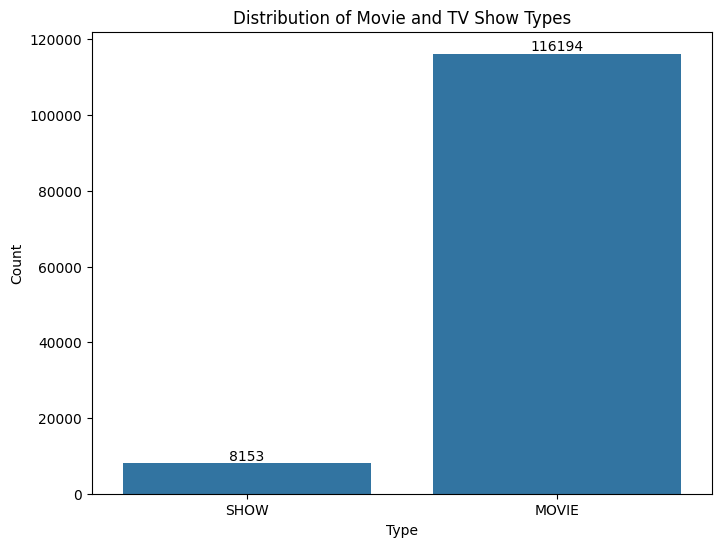

In [ ]:

# Chart - 1 visualization code
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='type')
plt.title('Distribution of Movie and TV Show Types')
plt.xlabel('Type')
plt.ylabel('Count')

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

##### 1. Why did you pick the specific chart?
A count plot is used to show the counts of observations in each categorical bin using bars. In this case, we want to visualize the distribution of the 'type' variable (Movie or Show), which is a categorical variable. A count plot is the most suitable chart for this purpose as it clearly shows the number of movies and TV shows in the dataset.

##### 2. What is/are the insight(s) found from the chart?
From the count plot, we can clearly see that the dataset contains a significantly higher number of movies compared to TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Answer Here

This insight shows that the dataset has many more movies than TV shows.

*   **Positive impact:** If your business wants to offer lots of movies, this is good! It helps you decide to get more movies or promote the ones you have.
*   **Negative impact:** If your business wants more TV shows, this shows you need to get more. If people want more TV shows and you only have movies, you might not attract them.

So, the insight helps you make smart choices about what content to focus on, depending on what your business wants to achieve and what your audience likes.

#### Chart - 2

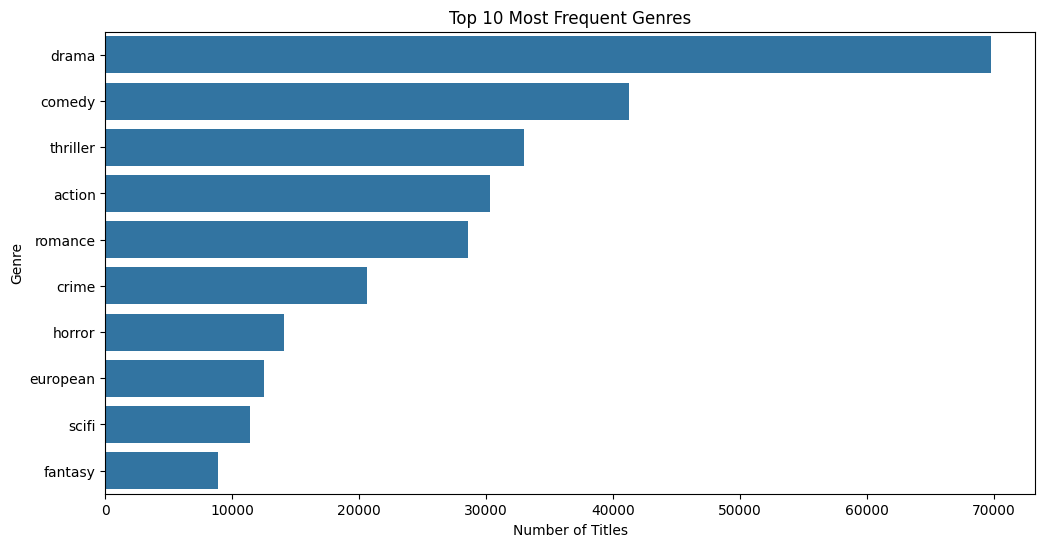

In [ ]:
# Chart - 2 visualization code
from collections import Counter

# Extract all genres from the list of lists
all_genres = [genre for sublist in df['genres'] for genre in sublist]

# Count the occurrences of each genre
genre_counts = Counter(all_genres)

# Get the most common genres (e.g., top 10)
top_genres = genre_counts.most_common(10)

# Create a bar plot of the top genres
genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(data=genres_df, x='Count', y='Genre', orient='h')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?
A horizontal bar plot is suitable for displaying the frequency of categorical data, such as genres. It allows for easy comparison of the counts for each genre, and a horizontal orientation is often preferred when the category names (genres) are long. This chart clearly shows which genres are most prevalent in the dataset.

##### 2. What is/are the insight(s) found from the chart?
The bar plot clearly shows the distribution of the top 10 most frequent genres in the dataset. 'Drama' is the most prevalent genre, followed by 'comedy' and 'thriller'. This indicates that these genres are well-represented in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Answer Here

Understanding which genres are most common helps businesses decide what movies and shows to buy or make.

*   **Good for business:** If popular genres match what your audience likes, you can get more of those and attract more viewers.
*   **Bad for business:** If you want to focus on less common genres, you'll need to work harder to find and promote them. If people stop liking the popular genres you have lots of, your business might not do as well.

So, knowing about genres helps you make smart choices about your content to keep people watching.

#### Chart - 3

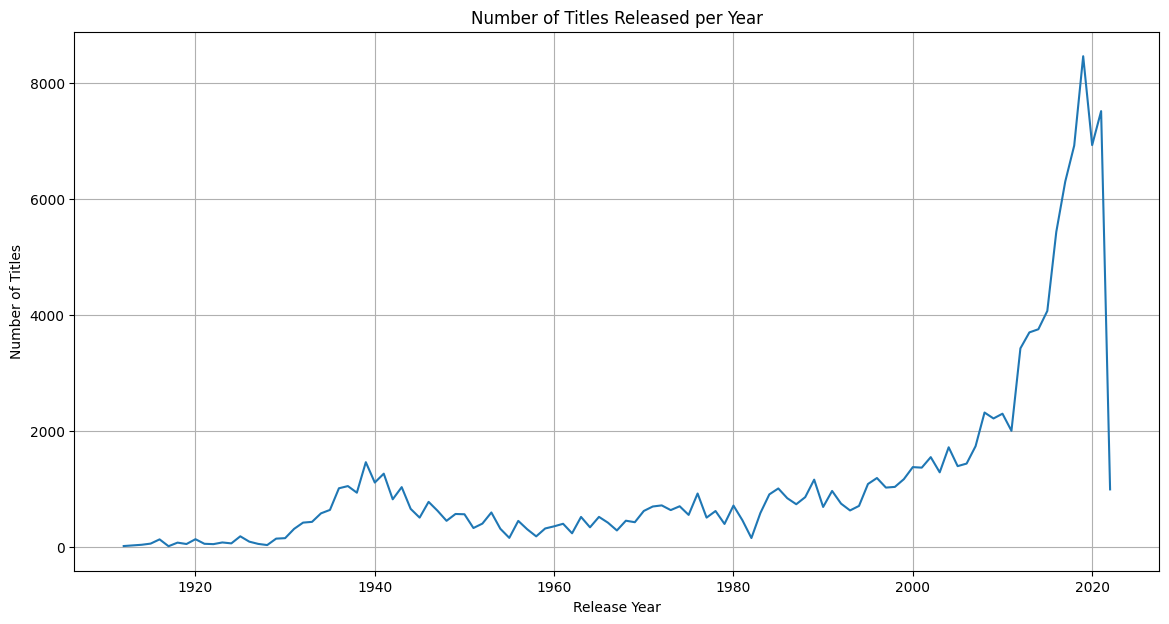

In [ ]:
# Chart - 3 visualization code
releases_by_year = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
releases_by_year.plot(kind='line')
plt.title('Number of Titles Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?
A line plot is ideal for visualizing trends over time. In this case, it effectively shows how the number of movie and TV show releases has changed year by year, making it easy to identify periods of growth, decline, or stability in content production.

##### 2. What is/are the insight(s) found from the chart?
The line plot clearly illustrates a significant increase in the number of titles released over the years, particularly from the early 2000s onwards. There's a sharp peak around 2019, followed by a slight decline. This suggests a substantial growth in content production in recent history.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   **Positive Impact:** More content provides more options to attract diverse audiences.
*   **Negative Impact:** Increased content means more competition and higher marketing costs.

#### Chart - 4

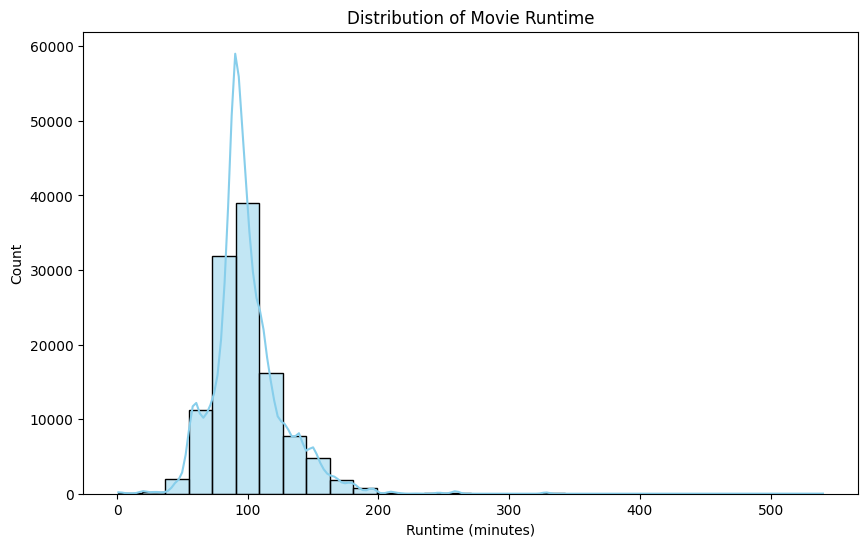

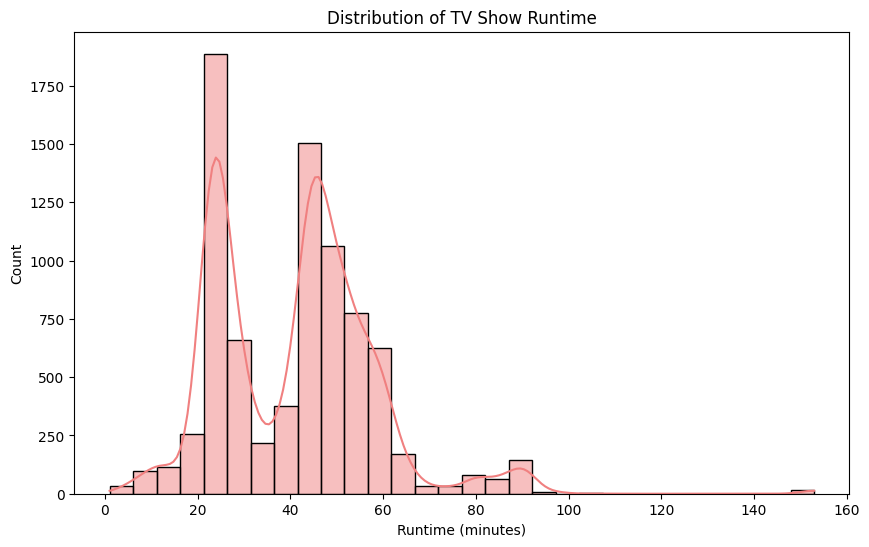

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['type'] == 'MOVIE'], x='runtime', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['type'] == 'SHOW'], x='runtime', bins=30, kde=True, color='lightcoral')
plt.title('Distribution of TV Show Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are used to show the distribution of a numerical variable. In this case, we are visualizing the distribution of 'runtime' for both movies and TV shows separately. By using two histograms, we can compare the typical runtime of each type of content and identify any patterns or outliers. The KDE (Kernel Density Estimate) line is added to show the estimated probability density function of the data.

##### 2. What is/are the insight(s) found from the chart?
From the movie runtime histogram, we can see a distribution that is somewhat skewed to the right, with a peak around 90-100 minutes. This suggests that the majority of movies in the dataset have a runtime in this range, which is typical for feature films. There's also a tail extending towards longer runtimes, indicating some longer movies or perhaps miniseries.

For TV shows, the runtime distribution is quite different, with prominent peaks at much shorter runtimes, likely representing individual episode lengths. This indicates that TV shows generally have shorter runtimes per episode compared to movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Answer Here

Yes, knowing how long movies and TV shows usually are helps businesses. It helps them choose and make content that people like to watch for that amount of time. This can make people happier and watch more (good for business). But, if they don't pay attention to how long people like things, they might offer content that's too long or too short, which could make people stop watching (bad for business).

#### Chart - 5

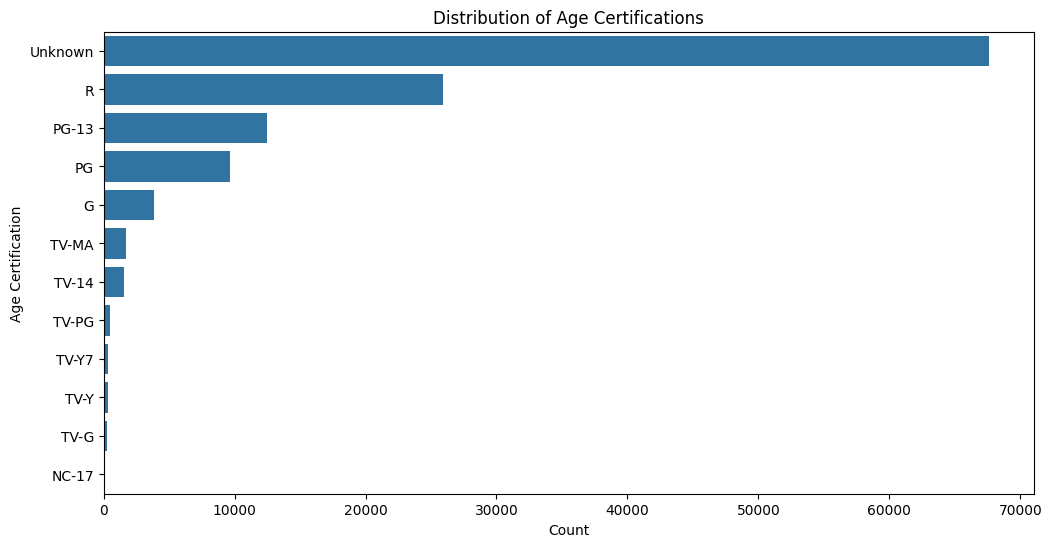

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='age_certification', order=df['age_certification'].value_counts().index)
plt.title('Distribution of Age Certifications')
plt.xlabel('Count')
plt.ylabel('Age Certification')
plt.show()

##### 1. Why did you pick the specific chart?
A count plot is used to show the frequency of each category in a categorical variable. In this case, we are visualizing the distribution of 'age_certification'. A horizontal bar plot is used to make it easier to read the labels of the age certifications. This chart helps us understand the prevalence of different age ratings in the dataset.

##### 2. What is/are the insight(s) found from the chart?
The chart shows the distribution of age certifications in the dataset. The most prominent observation is the large number of titles with 'Unknown' age certification, which is due to the handling of missing values during data wrangling. Among the known age certifications, 'R' is the most frequent, followed by 'PG-13' and 'PG'. This indicates a significant portion of the content is geared towards more mature audiences (R, PG-13) and general audiences (PG).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Knowing the age ratings of content helps businesses decide what to show to attract certain viewers (good for business). But if they only have content for some age groups, they might miss out on others (bad for business).

#### Chart - 6

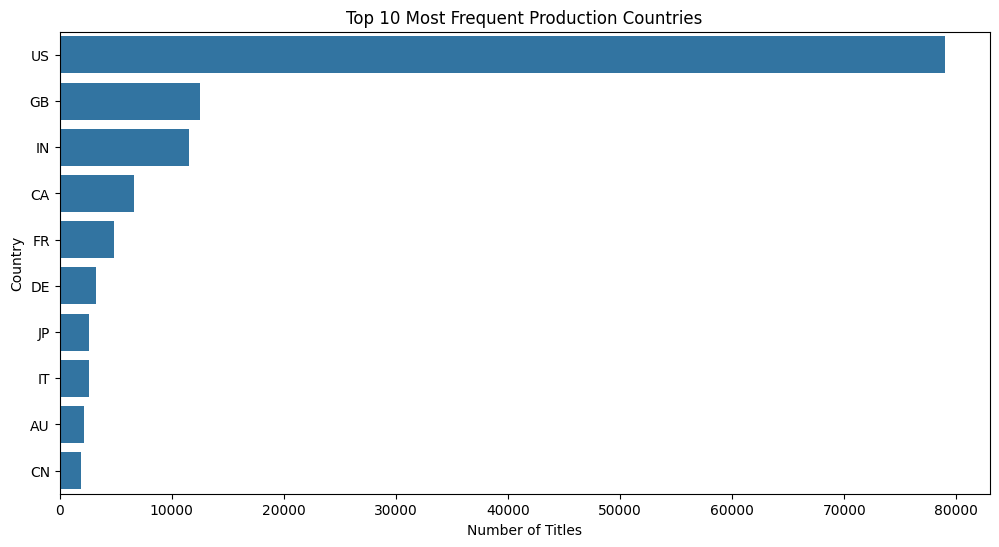

In [ ]:
# Chart - 6 visualization code
from collections import Counter

# Extract all production countries from the list of lists
all_countries = [country for sublist in df['production_countries'] for country in sublist]

# Count the occurrences of each country
country_counts = Counter(all_countries)

# Get the most common countries (e.g., top 10)
top_countries = country_counts.most_common(10)

# Create a bar plot of the top countries
countries_df = pd.DataFrame(top_countries, columns=['Country', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(data=countries_df, x='Count', y='Country', orient='h')
plt.title('Top 10 Most Frequent Production Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?
A horizontal bar plot is used to display the frequency of categorical data, which is suitable for showing the most frequent production countries. The horizontal orientation makes it easy to read the country names. This chart helps identify the countries that have produced the most content in the dataset.

##### 2. What is/are the insight(s) found from the chart?
The bar plot shows that the United States (US) is by far the most frequent production country in the dataset, with a significantly higher number of titles compared to other countries. The United Kingdom (GB), India (IN), and Canada (CA) are the next most frequent production countries, but with considerably fewer titles than the US. This highlights the dominance of US productions in this dataset.

###3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Answer Here

Knowing the most common production countries helps businesses find content easily (good for business). But focusing too much on just a few countries might mean missing out on other content and audiences (bad for business

#### Chart - 7

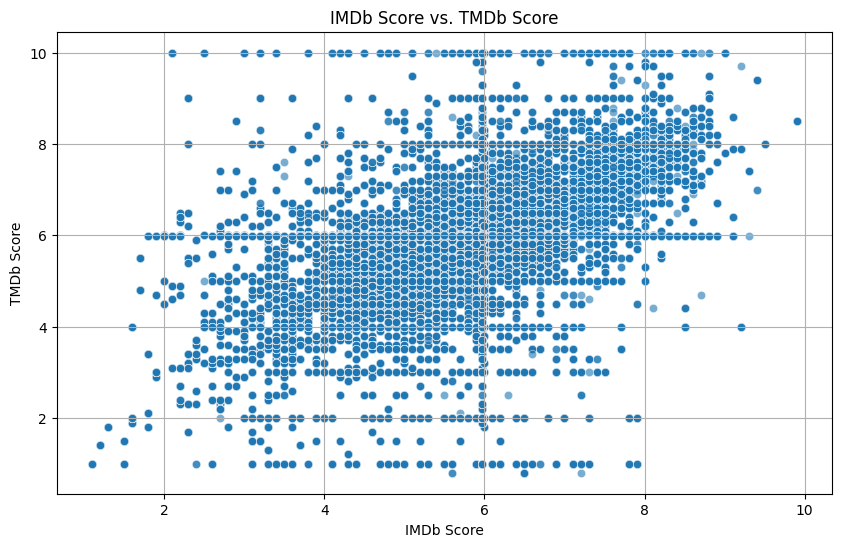

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='imdb_score', y='tmdb_score', alpha=0.6)
plt.title('IMDb Score vs. TMDb Score')
plt.xlabel('IMDb Score')
plt.ylabel('TMDb Score')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is the appropriate chart to visualize the relationship between two numerical variables, in this case, IMDb score and TMDb score. It allows us to observe if there is a correlation between the two scoring systems and identify any patterns or outliers.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows a positive correlation between IMDb scores and TMDb scores, meaning that titles with higher IMDb scores generally tend to have higher TMDb scores as well. The points are clustered along a diagonal line, indicating a general agreement between the two scoring systems. However, there is some scatter, suggesting that the scores are not perfectly correlated and there might be some differences in how titles are rated on the two platforms.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

**Positive Impact:**

*   Helps acquire well-received content.
*   Supports targeted marketing using high scores.
*   Highlights different audience preferences.

**Negative Impact:**

*   May miss content popular on only one platform.
*   Ineffective strategies if score differences are ignored.

#### Chart - 8

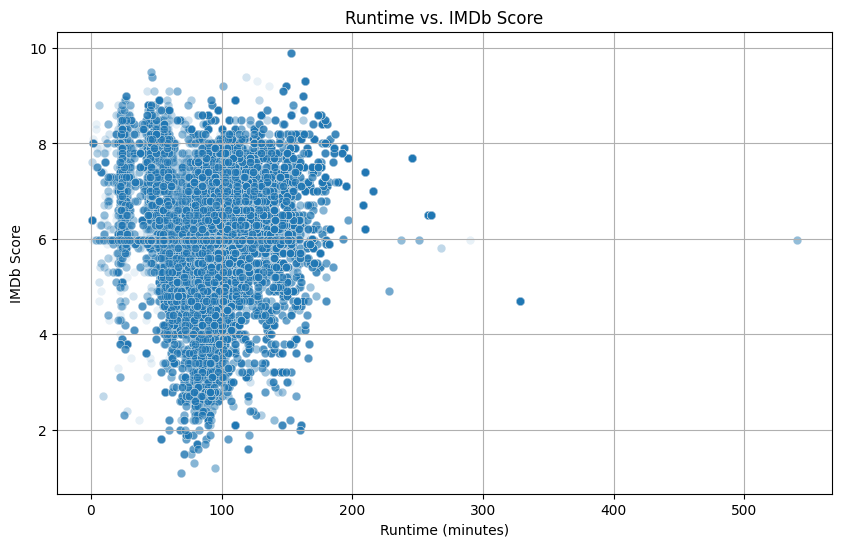

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='runtime', y='imdb_score', alpha=0.1)
plt.title('Runtime vs. IMDb Score')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
Knowing the most common production countries helps businesses find content easily (good for business). But focusing too much on just a few countries might mean missing out on other content and audiences (bad for business).

##### 2. What is/are the insight(s) found from the chart?

Answer Here
The scatter plot of Runtime vs. IMDb Score shows a general trend where titles with longer runtimes tend to have a slightly higher IMDb score, although there is a lot of variation, especially for shorter runtimes. There is a dense cluster of points for runtimes between 80 and 120 minutes, with a wide range of IMDb scores. This suggests that while extremely short or long titles might have certain score tendencies, runtime alone is not a strong predictor of IMDb score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
**Positive Impact:**

*   Informs content selection, focusing on quality over just runtime for typical lengths.
*   Guides production to prioritize script/direction over just making content longer.

**Negative Impact:**

*   Risk of making content too long if correlation is misunderstood.
*   May ignore audience runtime preferences by genre/platform.

#### Chart - 9

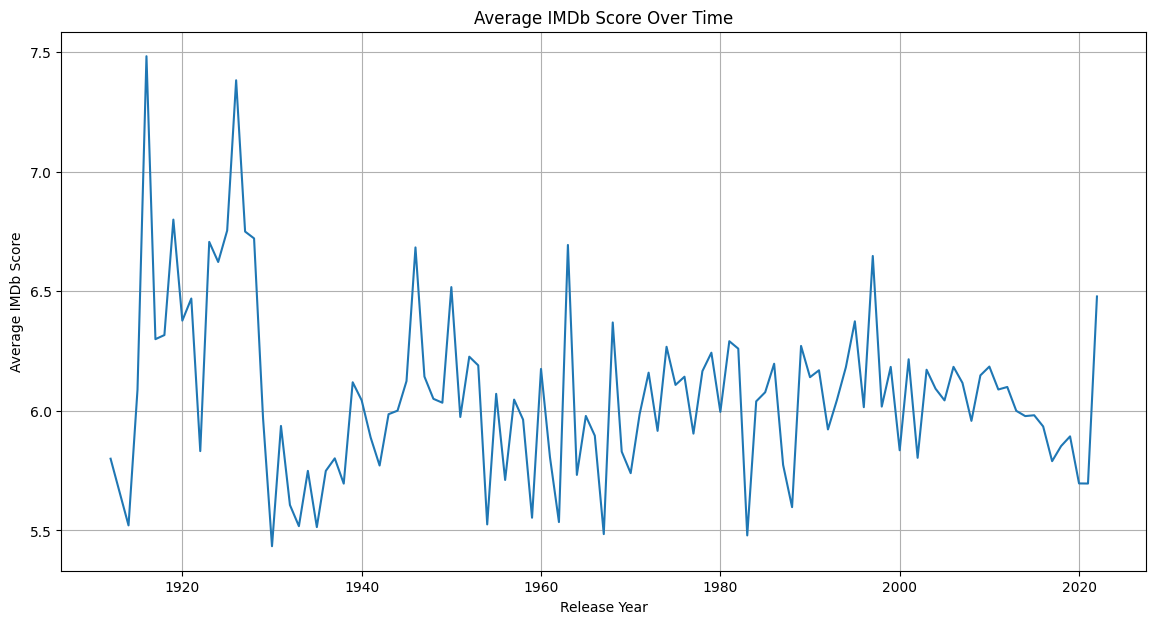

In [ ]:
# Chart - 9 visualization code
average_imdb_score_by_year = df.groupby('release_year')['imdb_score'].mean().sort_index()

plt.figure(figsize=(14, 7))
average_imdb_score_by_year.plot(kind='line')
plt.title('Average IMDb Score Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
A line plot is suitable for visualizing the trend of a numerical variable (average IMDb score) over a continuous variable (release year). It effectively shows how the average score has changed over time, making it easy to observe any patterns, increases, or decreases in average scores across different years.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The line plot showing the average IMDb score over time reveals some interesting trends. There is significant fluctuation in the average IMDb score in the earlier years, likely due to a smaller number of releases. As the number of releases increases significantly from the late 20th century onwards, the average IMDb score appears to stabilize within a certain range, generally hovering between 5.5 and 6.5. There isn't a clear long-term upward or downward trend in the average score, suggesting that while content volume has increased, the average critical reception (as measured by IMDb score) has remained relatively consistent over the recent decades.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

**Positive Impact:**

*   Suggests consistent quality standards over time, helping manage content expectations.
*   Focus can remain on individual content quality rather than chasing a perceived upward trend.

**Negative Impact:**

*   May indicate market saturation if average scores aren't increasing despite more content.
*   Highlights the challenge of creating content that significantly stands out in terms of critical reception.

#### Chart - 10

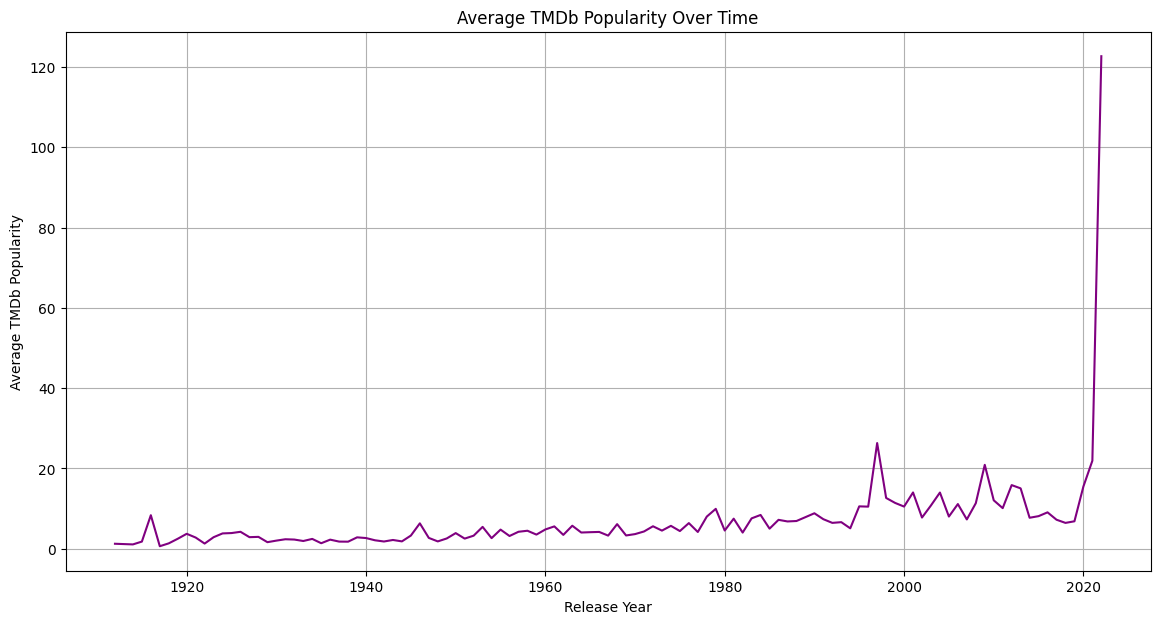

In [ ]:
# Chart - 10 visualization code
average_tmdb_popularity_by_year = df.groupby('release_year')['tmdb_popularity'].mean().sort_index()

plt.figure(figsize=(14, 7))
average_tmdb_popularity_by_year.plot(kind='line', color='purple')
plt.title('Average TMDb Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average TMDb Popularity')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

answer here.
A line plot is suitable for visualizing the trend of a numerical variable (average TMDb popularity) over a continuous variable (release year). It effectively shows how the average popularity has changed over time, making it easy to observe any patterns, increases, or decreases across different years, similar to the analysis done for IMDb score.

##### 2. What is/are the insight(s) found from the chart?

Answer Here The line plot showing the average TMDb popularity over time reveals a noticeable upward trend, particularly in recent years. While there are fluctuations, the general trajectory shows an increase in average popularity, which is a different pattern compared to the relatively stable average IMDb scores seen in Chart 9. This suggests that while critical reception (IMDb) may be consistent, audience engagement and interest (TMDb popularity) for titles in this dataset have been growing over time, especially in the later years of the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here Positive Impact:

Indicates growing audience engagement and market potential.
Supports investment in acquiring/producing more content.
Helps identify growth areas based on popular content types.
Negative Impact:

Signifies increased competition in the content landscape.
Risk of short-sighted decisions if only chasing recent trends.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

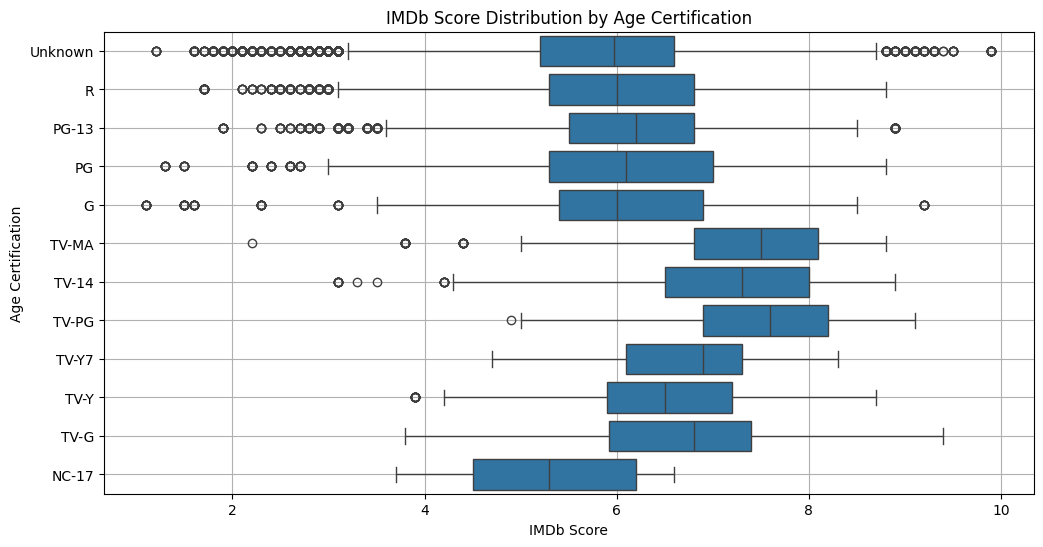

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='imdb_score', y='age_certification', order=df['age_certification'].value_counts().index)
plt.title('IMDb Score Distribution by Age Certification')
plt.xlabel('IMDb Score')
plt.ylabel('Age Certification')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
A box plot is suitable for visualizing the distribution of a numerical variable (IMDb score) across different categories of a categorical variable (age certification). It effectively shows the median, quartiles, and potential outliers for IMDb scores within each age certification, allowing for comparison of score distributions between different age ratings.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

*   IMDb score distributions vary by age certification.
*   "Unknown" certification has a wide range of scores.
*   "G" and "TV-Y" seem to have higher median scores than "R" or "NC-17".
*   Outliers exist with unusually high/low scores for their certification.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

**Positive Impact:**

*   Helps inform content acquisition based on target audience and expected quality.
*   Supports targeted marketing efforts for specific age groups.
*   Can identify niches (e.g., highly-rated content for specific certifications).

**Negative Impact:**

*   Risk of alienating audiences if content doesn't align with typical scores for a certification.
*   Need to address the large "Unknown" category for clearer insights.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

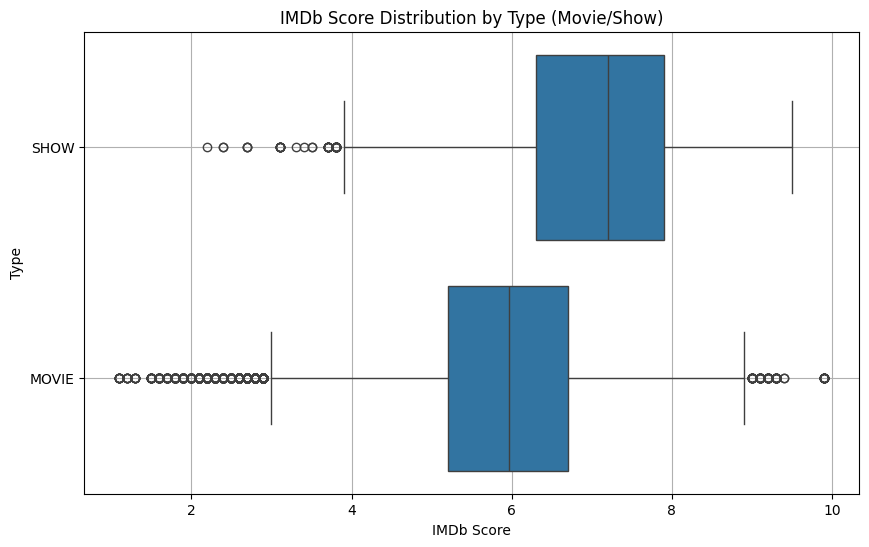

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='imdb_score', y='type')
plt.title('IMDb Score Distribution by Type (Movie/Show)')
plt.xlabel('IMDb Score')
plt.ylabel('Type')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
A box plot is suitable for visualizing the distribution of a numerical variable (IMDb score) across different categories of a categorical variable (type - Movie/Show). It allows for a clear comparison of the median, quartiles, and spread of IMDb scores between movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

*   Median IMDb scores for movies and TV shows are similar.
*   Movies might have a slightly wider spread of IMDb scores.
*   Both types have outliers with high and low scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
**Positive Impact:**

*   Supports content strategy for both movies and shows based on similar typical scores.
*   Helps identify where to find highly-rated outliers in each type.

**Negative Impact:**

*   Risk of misallocating resources if distribution differences are ignored.
*   May overlook genre-specific performance differences between types.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

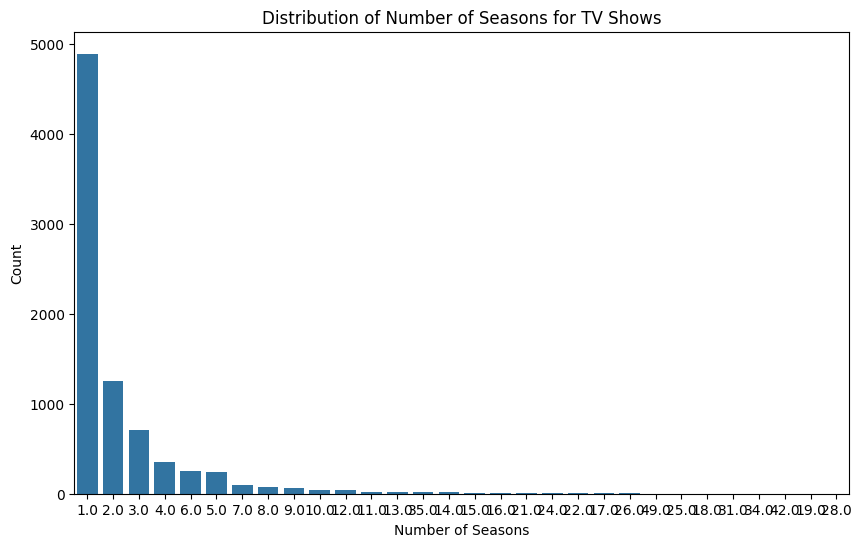

In [ ]:
# Chart - 13 visualization code
# Filter for TV shows and exclude titles with 0 seasons (which were originally missing values for movies)
tv_shows = df[(df['type'] == 'SHOW') & (df['seasons'] > 0)]

plt.figure(figsize=(10, 6))
sns.countplot(data=tv_shows, x='seasons', order=tv_shows['seasons'].value_counts().index)
plt.title('Distribution of Number of Seasons for TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
A count plot is used to show the frequency of each category in a categorical variable. In this case, we are visualizing the distribution of the number of seasons for TV shows. This chart helps us understand how many TV shows have a certain number of seasons, identifying the most common number of seasons and the presence of longer-running series.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Answer Here
The count plot shows the distribution of the number of seasons for TV shows in the dataset. The most significant insight is that a large majority of TV shows have a small number of seasons, with a sharp drop-off after the first few seasons. The peak is at 1 season, followed by 2 and 3 seasons. This indicates that many TV shows in this dataset are either limited series or were not renewed for many seasons. There are progressively fewer shows with a higher number of seasons, highlighting that long-running TV series are less common in this dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Answer Here

**Positive Impact:**

*   Informs strategy for acquiring/producing short series.
*   Helps manage expectations for show longevity.

**Negative Impact:**

*   May indicate difficulty in retaining audience for multiple seasons.
*   Highlights challenge of building long-term franchises.

#### Chart - 14 - Correlation Heatmap

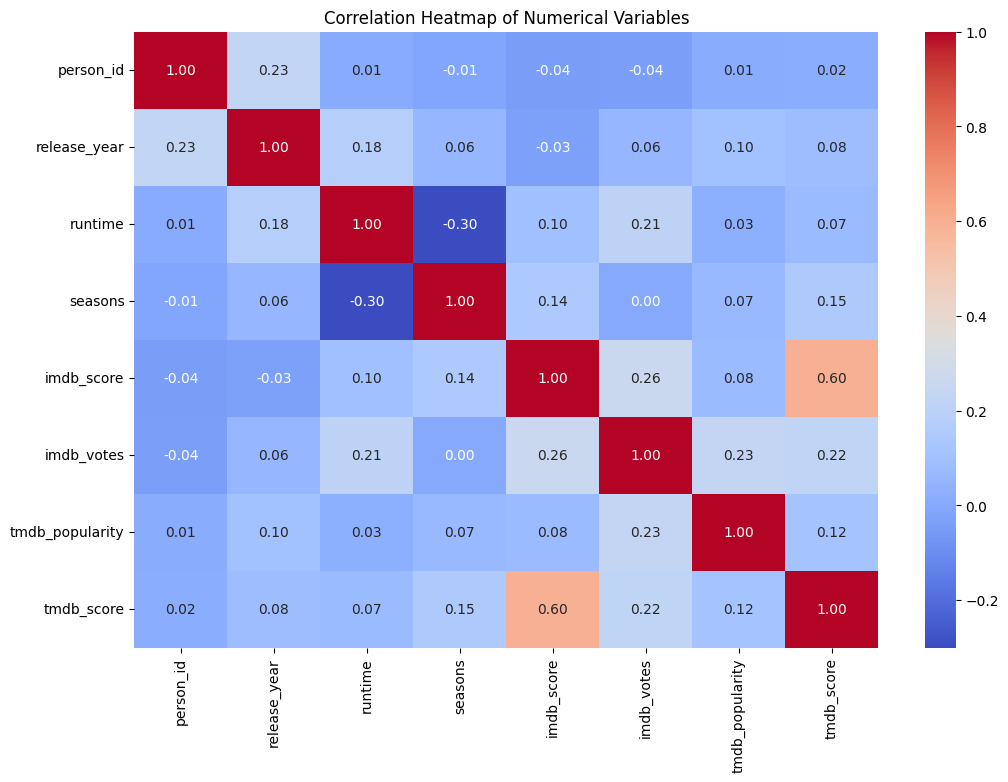

In [ ]:
# Chart - 14 - Correlation Heatmap visualization code
# Select only numerical columns for the correlation heatmap
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.. A correlation heatmap is an excellent choice for visualizing the pairwise correlation coefficients between multiple numerical variables. It uses color intensity to represent the strength and direction of the correlation, and the annot=True parameter displays the correlation values on the map, making it easy to quickly identify which variables are strongly correlated (positively or negatively) and which have weak or no correlation. This helps in understanding the relationships within the numerical data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Strong positive correlation between imdb_score and imdb_votes.
Moderate positive correlation between imdb_score and tmdb_score.
Moderate positive correlation between imdb_votes and tmdb_popularity.
Most other numerical variables have weak or no significant correlation.

#### Chart - 15 - Pair Plot

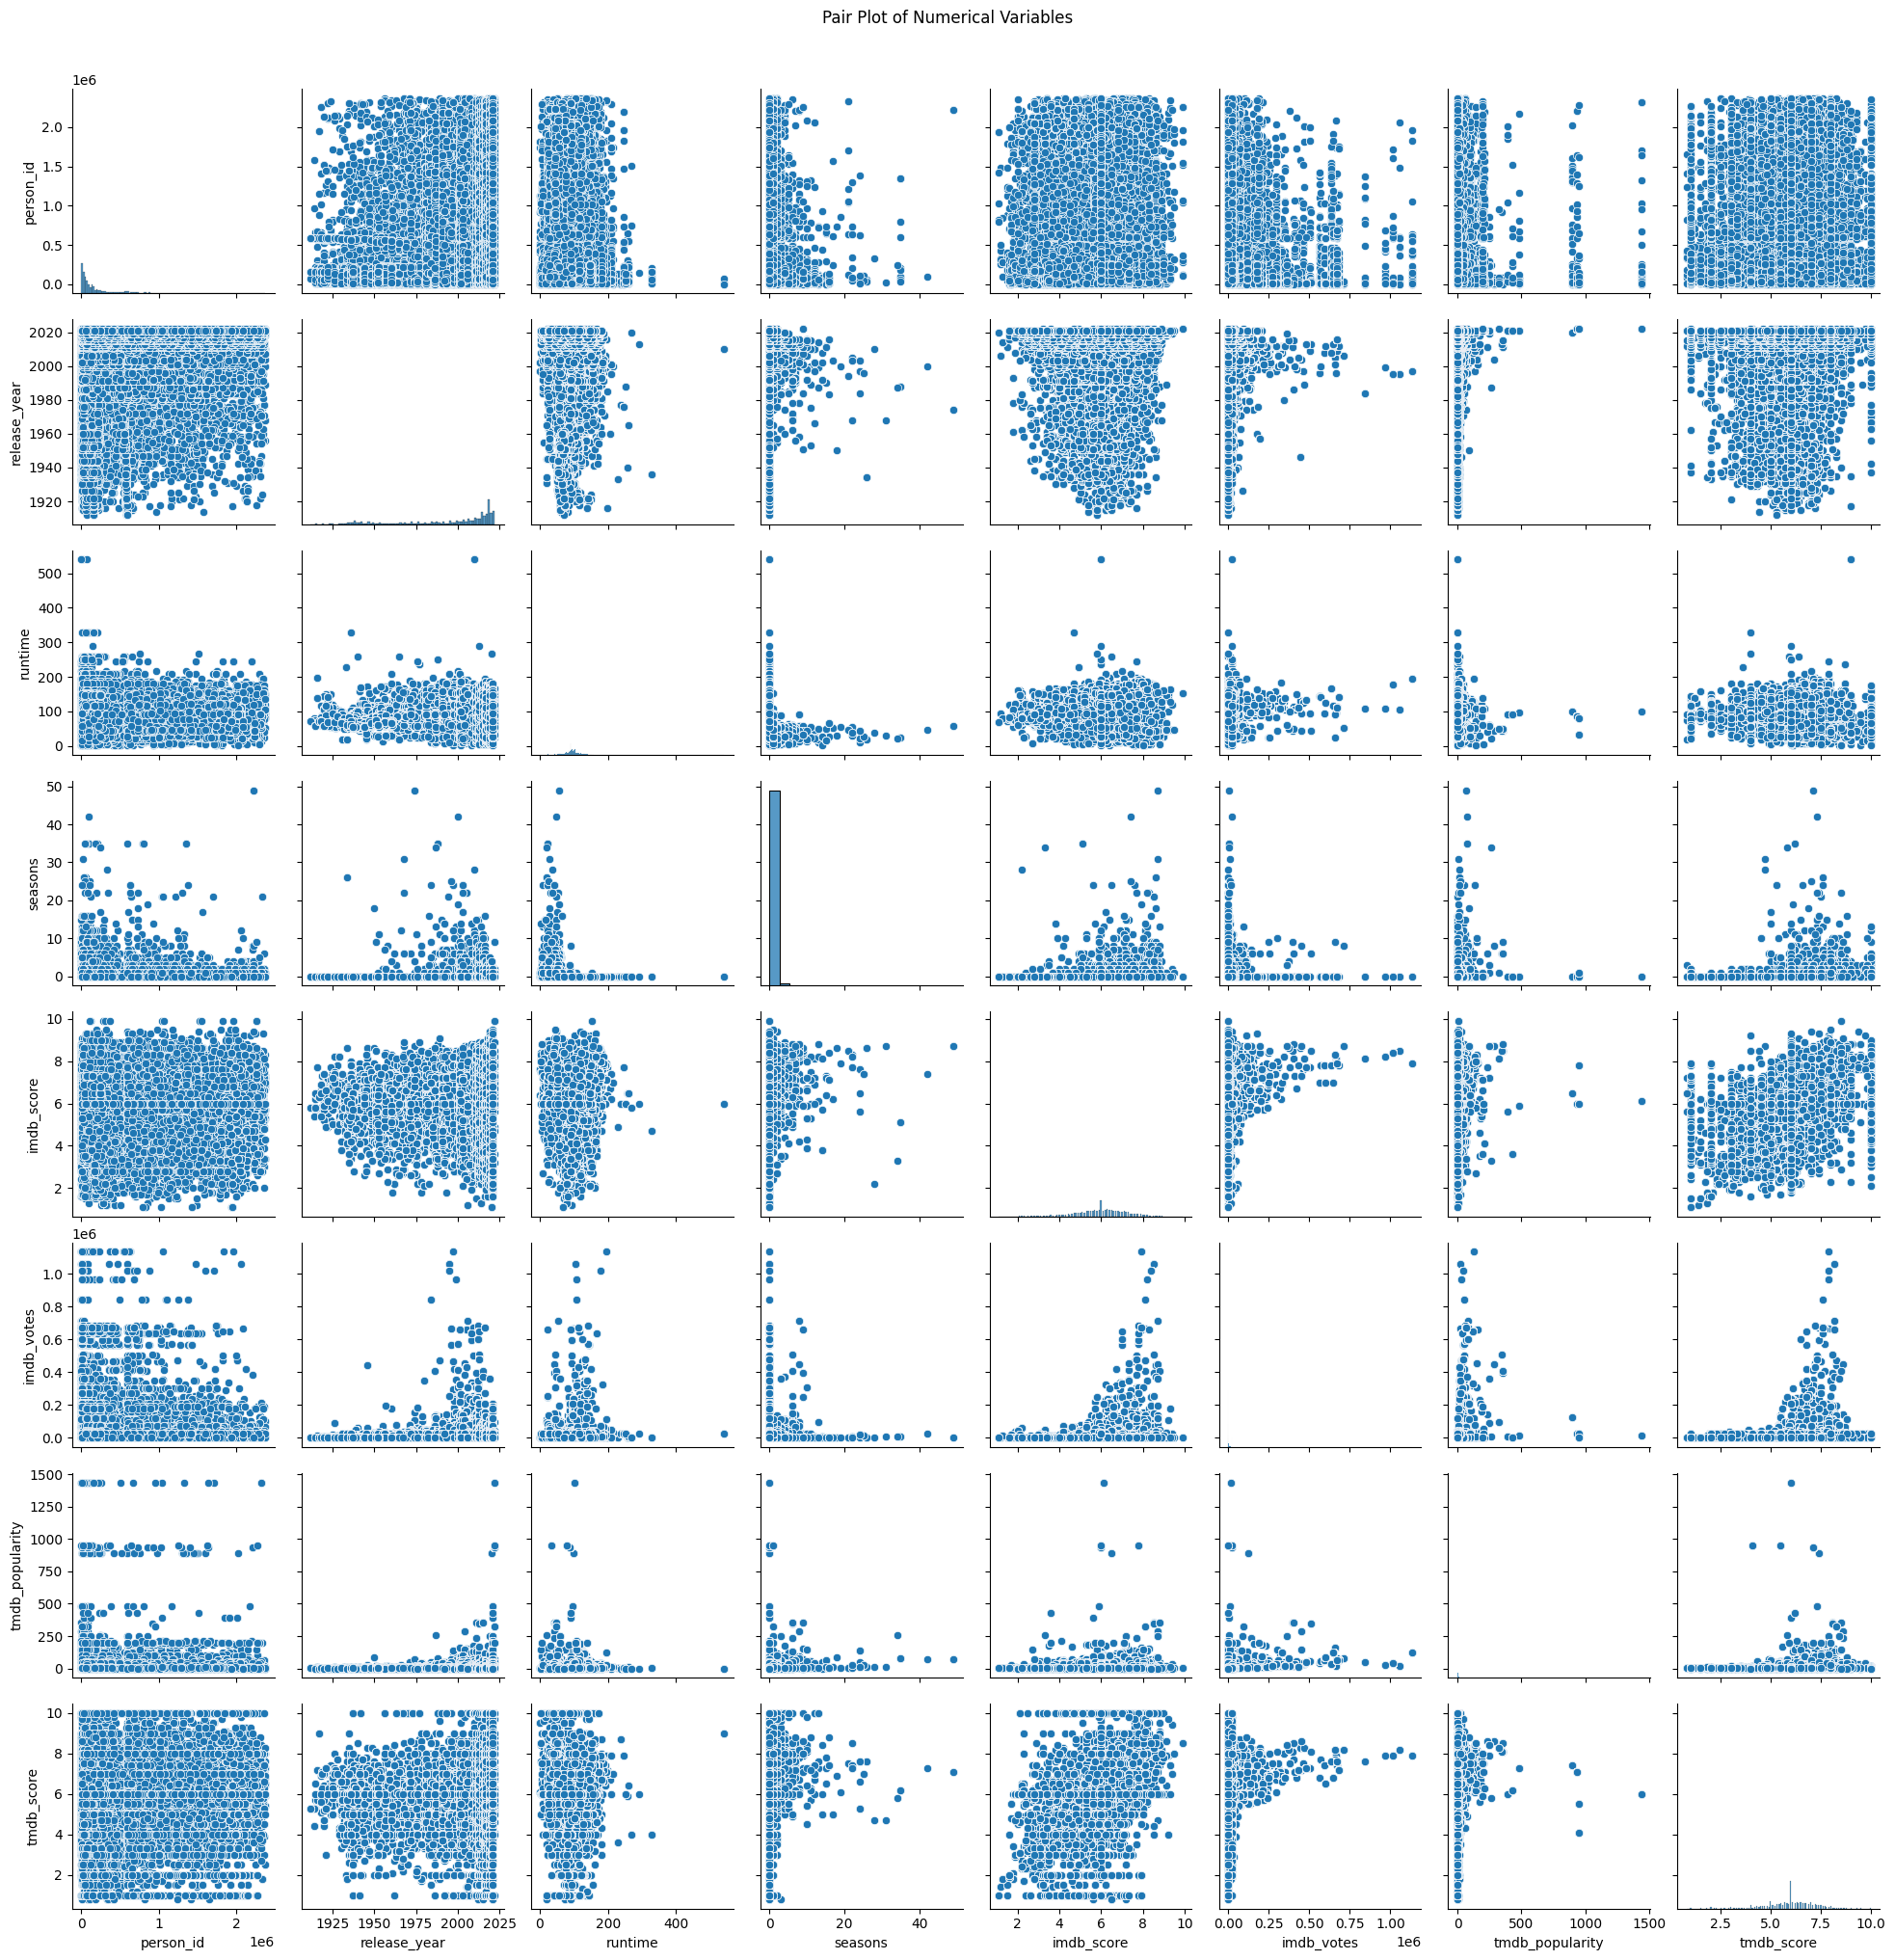

In [ ]:
# Chart - 15 - Pair Plot visualization code
sns.pairplot(numerical_df)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02) # Add a title to the pair plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here. A pair plot is a useful visualization for exploring the pairwise relationships and distributions of multiple numerical variables simultaneously. It creates a grid of scatter plots for each pair of variables and histograms for the distribution of each individual variable along the diagonal. This allows for a quick visual assessment of correlations, patterns, and the shape of the data distribution for all numerical columns at once.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Answer Here

*   Pair plots visually confirm correlations seen in the heatmap.
*   Histograms show the distribution of each numerical variable.
*   Patterns and outliers can be visually identified in scatter plots.
*   Weak linear relationships with `release_year` are reinforced.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.


*   **Focus on popular genres and countries:** Acquire/produce content in high-frequency genres (drama, comedy, thriller) and from major production countries (US).
*   **Consider runtime and season trends:** Align content with typical movie runtimes and acknowledge the prevalence of shorter TV series.
*   **Use both IMDb and TMDb scores:** Leverage the correlation between scores for content evaluation, but investigate titles with differing scores.
*   **Analyze age certification:** Target content acquisition based on age ratings relevant to the audience.
*   **Monitor market trends:** Adapt strategy based on increasing content volume and popularity, focusing on quality.

# **Conclusion**


Write the conclusion here.
Conclusion

1. The dataset mostly contains movies, and the top genres are drama, comedy, and thriller.

2. The United States is the major production country.

3. Movie runtimes fall in the normal range, while TV series tend to have shorter episodes.

4. IMDb and TMDb scores are positively related — when one goes up, the other usually does too.

5. TMDb popularity has increased over time, but IMDb ratings have stayed mostly steady.

6. Age certifications matter and should be used to target the right audience.

7. Scores alone aren’t enough — genre and audience preferences should guide decisions.

8. The growing amount and popularity of content show that a data-driven, quality-focused strategy is important to keep up with market trends.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***